Temps estimés :
- Parties 2/3 lois et théorèmes : 1/2 journée
- 4.2.1 > 4.2.3 : 1 journée
- 4.2.4 : 1/2 journée
- 5 enquête bonheur : 1/2 journée

Signification des émoticones :
- 🌞 : documentations importantes
- 🌚 : en complément
- (vide) : à vous de voir

# Import des librairies

In [1]:
# manipulation de dataframes
import pandas as pd 

🌞 https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [2]:
# réalisation des graphiques
import matplotlib.pyplot as plt

In [3]:
# réalisation des graphiques
import seaborn as sns

In [4]:
# tests d'hypothèses
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

In [5]:
# calculs scientifiques
import numpy as np

In [6]:
# fonction de répartition empirique
from statsmodels.distributions.empirical_distribution import ECDF

# Quelques lois intéressantes à connaitre en statistiques

Nous notons ici différentes lois intéressantes en statistiques. L'idée ici n'est pas de les connaitre toutes dans un premier temps, mais de savoir qu'elles existent. L'intérêt des lois pour nous aujourd'hui est de pouvoir comparer la distribution de nos variables à ces lois.

## Modèles discrets

Les variables aléatoires <b/>discrètes</b> prennent <b/>un nombre fini ou dénombrable</b> de valeurs distinctes.</br>
</br>

- Loi Uniforme : https://fr.wikipedia.org/wiki/Loi_uniforme_discr%C3%A8te</br>
La probabilité que la variable aléatoire X prenne chacune des valeurs de son support est identique, autrement dit, il y a équiprobabilité.</br>
</br>

- Loi de Bernouilli : https://fr.wikipedia.org/wiki/Loi_de_Bernoulli</br>
On considère une épreuve aléatoire à deux issues. L'une est considérée comme le succès, l'autre comme l'échec. C'est ce que l'on appelle une épreuve de Bernoulli.</br>
Par exemple, on lance un dé. On obtient 6, c'est le succès. On n'obtient pas 6, c'est l'échec.</br>
</br>

- Loi Binomiale : https://fr.wikipedia.org/wiki/Loi_binomiale</br>
On considère à nouveau une épreuve de Bernoulli : épreuve aléatoire à deux issues. L'une est considérée comme le succès, l'autre comme l'échec. Cette fois, on répète cette épreuve de manière identique et indépendante pour obtenir ce que l'on appelle un schéma de Bernoulli. </br>
Exemple : on reprend le lancer de dé. On lance ce dé un certain nombre de fois. Disons n fois, n étant un entier naturel non nul. On désigne par X la VAD qui compte le nombre de succès, c'est-à-dire le nombre de fois où on a obtenu un 6.

🌚 https://openclassrooms.com/fr/courses/4525296-maitrisez-les-bases-des-probabilites/5327541-apprenez-a-utiliser-quelques-lois-usuelles-discretes

## Modèles continus

Les variables aléatoires <b/>continues</b> peuvent prendre <b/>une infinité de valeurs</b> dans un intervalle donné.</br>

- Loi Uniforme : https://fr.wikipedia.org/wiki/Loi_uniforme_continue</br>
Toutes les valeurs possibles d'un intervalle donné ont la même probabilité de se produire.</br>

- Loi Normale : https://fr.wikipedia.org/wiki/Loi_normale</br>
C'est une loi symétrique en forme de cloche, où la majorité des valeurs se concentrent autour de la moyenne, avec une décroissance des probabilités à mesure que l'on s'éloigne de celle-ci.</br>

- Loi de Student : https://fr.wikipedia.org/wiki/Loi_de_Student</br>
Cette loi est utilisée pour estimer les moyennes de populations normalement distribuées lorsqu'on a un petit échantillon, caractérisée par des queues plus épaisses que celles de la loi normale.</br>

- Loi du Chi-Deux : https://fr.wikipedia.org/wiki/Loi_du_%CF%87%C2%B2</br>
On l'utilise pour tester l'adéquation entre des données observées et des données théoriques. Elle est souvent appliquée dans les tests d'indépendance et les tests d'ajustement.

🌚 https://openclassrooms.com/fr/courses/4525296-maitrisez-les-bases-des-probabilites/5437151-familiarisez-vous-avec-quelques-lois-usuelles-continues

## Focus sur la Loi Normale : la plus intéressante pour nous aujourd'hui

Générons de manière aléatoire une variable température (de moyenne 15°C et d'écart-type 3°C par exemple) qui suivrait une loi Normale afin de se rendre compte de la forme qu'elle a :

https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

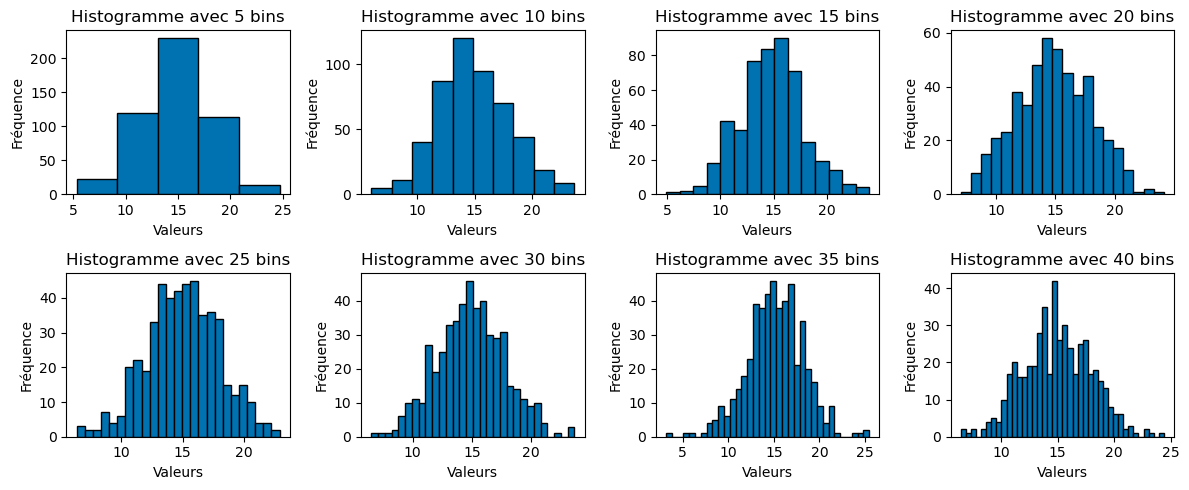

In [7]:
plt.style.use('seaborn-v0_8-colorblind')
list_bins=[5, 10, 15, 20, 25, 30,35, 40]
# création d'un histogramme for each bins
fig, axs = plt.subplots(2, 4, figsize=(12, 5))
for i, bins in enumerate(list_bins):
    ax = axs[i // 4, i % 4]
    ax.hist(np.random.normal(15, 3, 500), bins=bins, edgecolor='black')
    ax.set_title(f'Histogramme avec {bins} bins')
    ax.set_xlabel('Valeurs')
    ax.set_ylabel('Fréquence')
plt.tight_layout()





(array([   9.,   13.,   42.,  159.,  350.,  704., 1240., 1905., 2572.,
        2895., 2868., 2536., 1981., 1290.,  770.,  381.,  183.,   79.,
          15.,    8.]),
 array([ 3.75331976,  4.87007249,  5.98682523,  7.10357796,  8.2203307 ,
         9.33708343, 10.45383617, 11.5705889 , 12.68734164, 13.80409437,
        14.92084711, 16.03759984, 17.15435258, 18.27110531, 19.38785805,
        20.50461078, 21.62136352, 22.73811625, 23.85486899, 24.97162172,
        26.08837446]),
 <BarContainer object of 20 artists>)

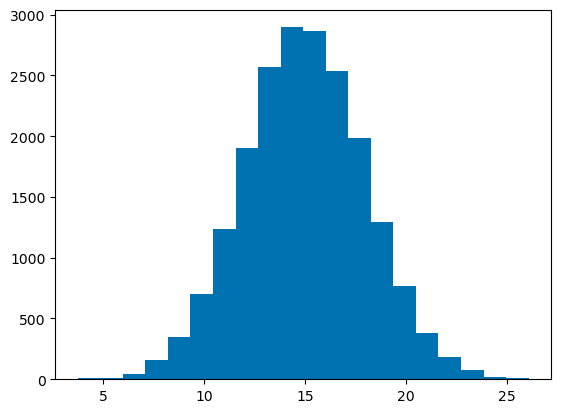

In [8]:
plt.hist(np.random.normal(15, 3, 20000),bins=20)

Que se passe-t-il si on joue avec la size ?

Lorsque l'échantillon est de taille 500, la distribution est très irrégulière.
Lorsque l'échantillon est de taille 1000, la distribution est plus régulière.
Lorsque l'échantillon est de taille 20000, la distribution est très régulière.
Plus la taille de l'echantillon augmente plus la répartition rensemble à celui d'une loi normale

# Quelques théorèmes fondamentaux à connaitre en statistiques

## La loi des grands nombres

Ressources :</br>
- 🌞 https://www.youtube.com/watch?v=HRnYFpdR8WM
- https://fr.wikipedia.org/wiki/Loi_des_grands_nombres
- 🌚 https://openclassrooms.com/fr/courses/4525296-maitrisez-les-bases-des-probabilites/5422416-decouvrez-la-loi-faible-des-grands-nombres

**En résumé** : elle signifie que la moyenne empirique (calculée sur les valeurs d’un échantillon), converge vers l’espérance (moyenne de la population globale réelle : extrapolation) lorsque la taille de l’échantillon tend vers l’infini.

## Le Théorème Central Limite (TCL)

Ressources :</br>
- 🌞 https://www.youtube.com/watch?v=4dhm2QAA2x4
- 🌞 https://www.youtube.com/watch?v=YAlJCEDH2uY
- https://fr.wikipedia.org/wiki/Th%C3%A9or%C3%A8me_central_limite
- 🌚 https://openclassrooms.com/fr/courses/4525296-maitrisez-les-bases-des-probabilites/5422586-utilisez-le-theoreme-central-limite
- 🌚 Afin de bien saisir la notion, vous pouvez jouer avec ce simulateur : https://im2ag-shiny.univ-grenoble-alpes.fr/fcorset/TCL/
- 🌚 Un autre petit jeu à explorer pour comprendre : https://probastat.dyndoc.fr/statinf/aep

**En résumé** : il établit la convergence en loi de la somme d'une suite de variables aléatoires vers la loi normale.

# Sujet 1 : Les passagers du Titanic

🌞 Source : https://www.kaggle.com/datasets/vinicius150987/titanic3

## A quoi ressemblent nos données ?

### Importons le jeu de données

In [9]:
titanic_data = pd.read_csv("./data/titanic_complet.csv",sep=";")
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   object 
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   object 
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(5), object(9)
memory usage: 143.4+ KB


### Combien y a-t-il de personnes sur le paquebot ?

In [10]:
print("Il y a ",len(titanic_data),"personnes dans le jeu de données")

Il y a  1310 personnes dans le jeu de données


### Combien d'informations a-t-on sur ces personnes ?

In [11]:
print("Il y a",len(titanic_data.columns),"colonnes dans le jeu de données")

Il y a 14 colonnes dans le jeu de données


### Regardons les premières lignes de nos données afin de se faire une idée

In [12]:
titanic_data.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29,0.0,0.0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,"0,9167",1.0,2.0,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48,0.0,0.0,19952,"26,5500",E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63,1.0,0.0,13502,"77,9583",D7,S,10,NaN,"Hudson, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39,0.0,0.0,112050,"0,0000",A36,S,NaN,NaN,"Belfast, NI"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2.0,0.0,11769,"51,4792",C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71,0.0,0.0,PC 17609,"49,5042",NaN,C,NaN,22.0,"Montevideo, Uruguay"


### Réalisons un résumé statistique afin d'avoir une idée des chiffres globaux

In [13]:
titanic_data.describe()

,pclass,survived,sibsp,parch,body
count,1309.000000,1309.000000,1309.000000,1309.000000,121.000000
mean,2.294882,0.381971,0.498854,0.385027,160.809917
std,0.837836,0.486055,1.041658,0.865560,97.696922
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,72.000000
50%,3.000000,0.000000,0.000000,0.000000,155.000000
75%,3.000000,1.000000,1.000000,0.000000,256.000000
max,3.000000,1.000000,8.000000,9.000000,328.000000


## Analyse univariée : quelles informations pourraient être intéressantes à regarder par variable ?

### Regardons les variables qualitatives

#### Quelles sont les variables qualitatives ?

Toutes les variables sont qualitatives a l'exeption de fare , age , sibsp , parch

#### Quelle est la part d'hommes et de femmes ?

Réalisons la table de contingence des effectifs :

In [14]:
# Réalisons la table de contingence des effectifs: drop fare, age, sibsp, parch
for col in ['pclass','survived','embarked']:
    
    table_effectifs = pd.crosstab(titanic_data["sex"],
                                    titanic_data[col],
                                    margins=True,
                                    margins_name="Total")
    print(table_effectifs)
    print("____________________________________________________________________________________________")




pclass  1.0  2.0  3.0  Total
sex                         
female  144  106  216    466
male    179  171  493    843
Total   323  277  709   1309
____________________________________________________________________________________________
survived  0.0  1.0  Total
sex                      
female    127  339    466
male      682  161    843
Total     809  500   1309
____________________________________________________________________________________________
embarked    C    Q    S  Total
sex                           
female    113   60  291    464
male      157   63  623    843
Total     270  123  914   1307
____________________________________________________________________________________________


Réalisons la table de contingence des fréquences :

https://fr.wikipedia.org/wiki/Fr%C3%A9quence_(statistiques)

In [15]:
for col in ['pclass','survived','embarked']:
    
    table_effectifs = pd.crosstab(titanic_data["sex"],
                                    titanic_data[col],
                                    margins=True,
                                    margins_name="Total",
                                    normalize='index')
    print(table_effectifs)
    print("____________________________________________________________________________________________")



pclass       1.0       2.0       3.0
sex                                 
female  0.309013  0.227468  0.463519
male    0.212337  0.202847  0.584816
Total   0.246753  0.211612  0.541635
____________________________________________________________________________________________
survived       0.0       1.0
sex                         
female    0.272532  0.727468
male      0.809015  0.190985
Total     0.618029  0.381971
____________________________________________________________________________________________
embarked         C         Q         S
sex                                   
female    0.243534  0.129310  0.627155
male      0.186240  0.074733  0.739027
Total     0.206580  0.094109  0.699311
____________________________________________________________________________________________


#### Représentons ça sous forme de graphiques afin que ce soit plus visuel

Diagramme en barres en effectifs :

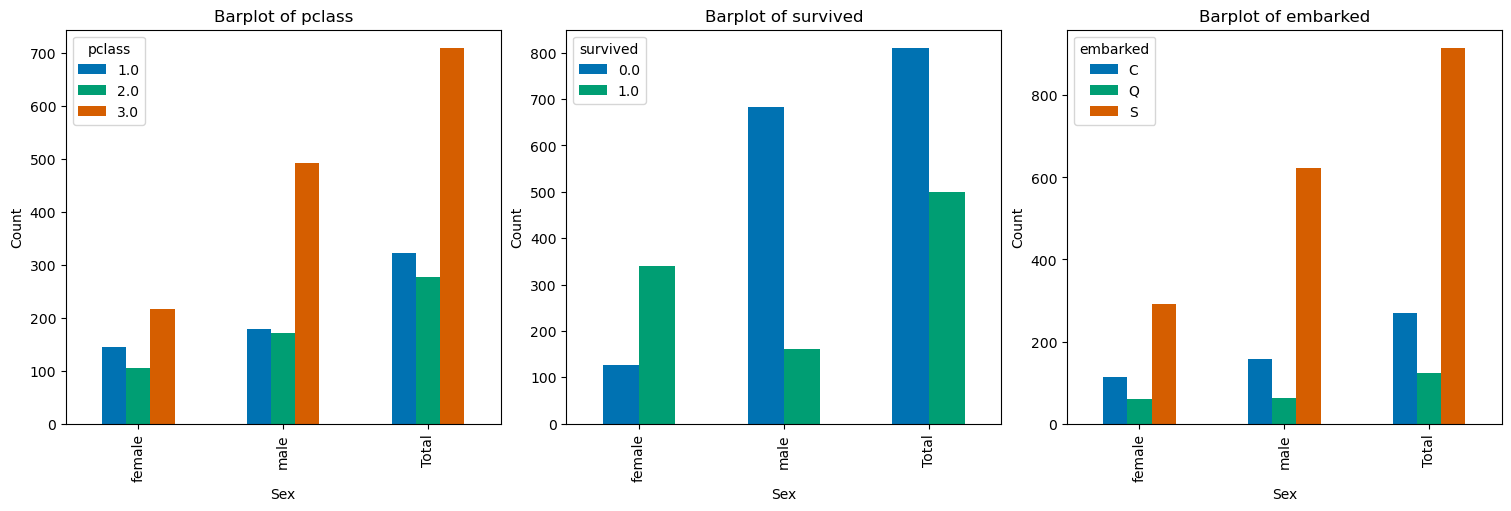

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)

for i, col in enumerate(['pclass', 'survived', 'embarked']):
    table_effectifs = pd.crosstab(titanic_data["sex"],
                                  titanic_data[col],
                                  margins=True,
                                  margins_name="Total")
    table_effectifs.drop("Total", axis=1, inplace=True)
    
    table_effectifs.plot(kind="bar", ax=axs[i], title=col)
    axs[i].set_title(f"Barplot of {col}")
    axs[i].set_xlabel("Sex")
    axs[i].set_ylabel("Count")

plt.show()



Diagramme en barres en proportion :

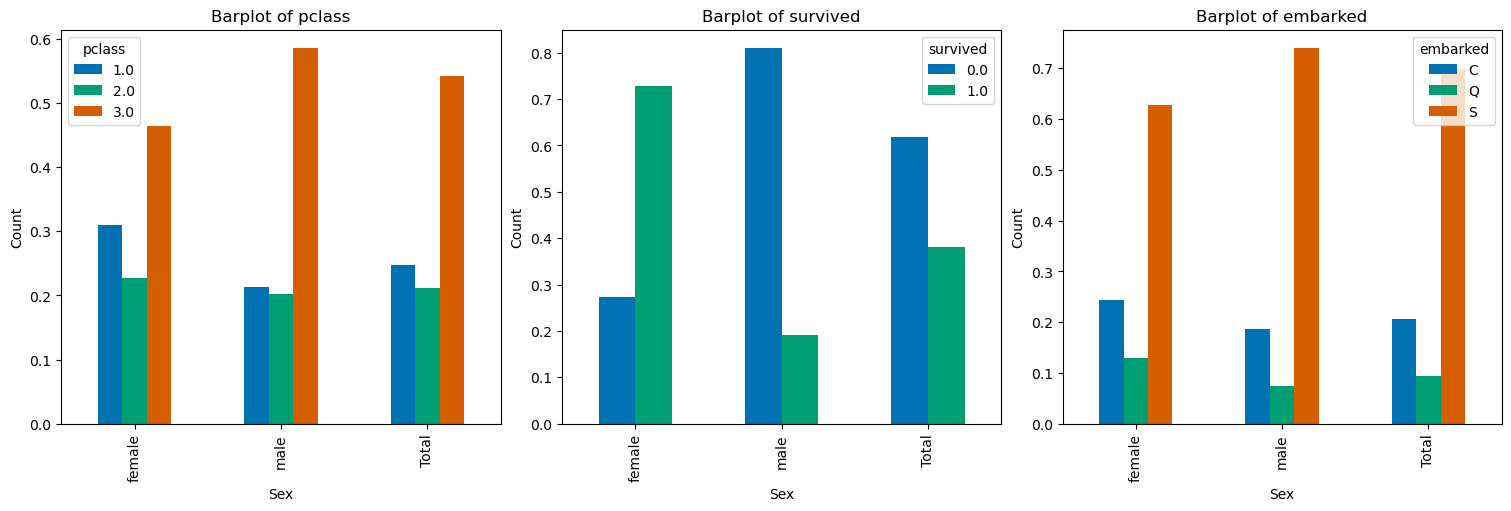

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)

for i, col in enumerate(['pclass', 'survived', 'embarked']):
    table_effectifs = pd.crosstab(titanic_data["sex"],
                                  titanic_data[col],
                                  margins=True,
                                  margins_name="Total",
                                  normalize='index')
    
    table_effectifs.plot(kind="bar", ax=axs[i], title=col)
    axs[i].set_title(f"Barplot of {col}")
    axs[i].set_xlabel("Sex")
    axs[i].set_ylabel("Count")

plt.show()

#### Continuez d'explorer ce qui vous semble intéressant !

Regardont si avoir de la famille est plus dangeureux

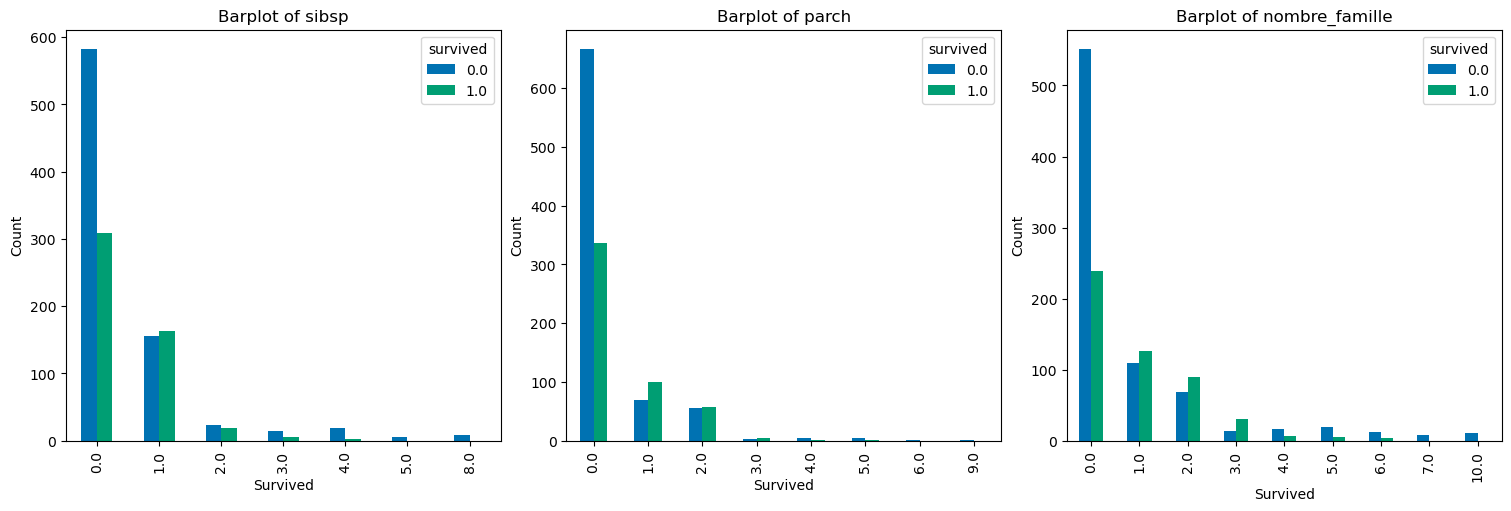

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)
titanic_data2= titanic_data.copy()
titanic_data2['nombre_famille']= titanic_data2['sibsp'] + titanic_data2['parch']

for i, col in enumerate(['sibsp', 'parch', 'nombre_famille']):
    table_effectifs = pd.crosstab(titanic_data2[col],
                                  titanic_data2['survived'],
                                  margins=True,
                                  margins_name="Total",)
    table_effectifs.drop("Total", axis=1, inplace=True)
    table_effectifs.drop("Total", axis=0, inplace=True)
    table_effectifs.plot(kind="bar", ax=axs[i], title=col)
    axs[i].set_title(f"Barplot of {col}")
    axs[i].set_xlabel("Survived")
    axs[i].set_ylabel("Count")

plt.show()

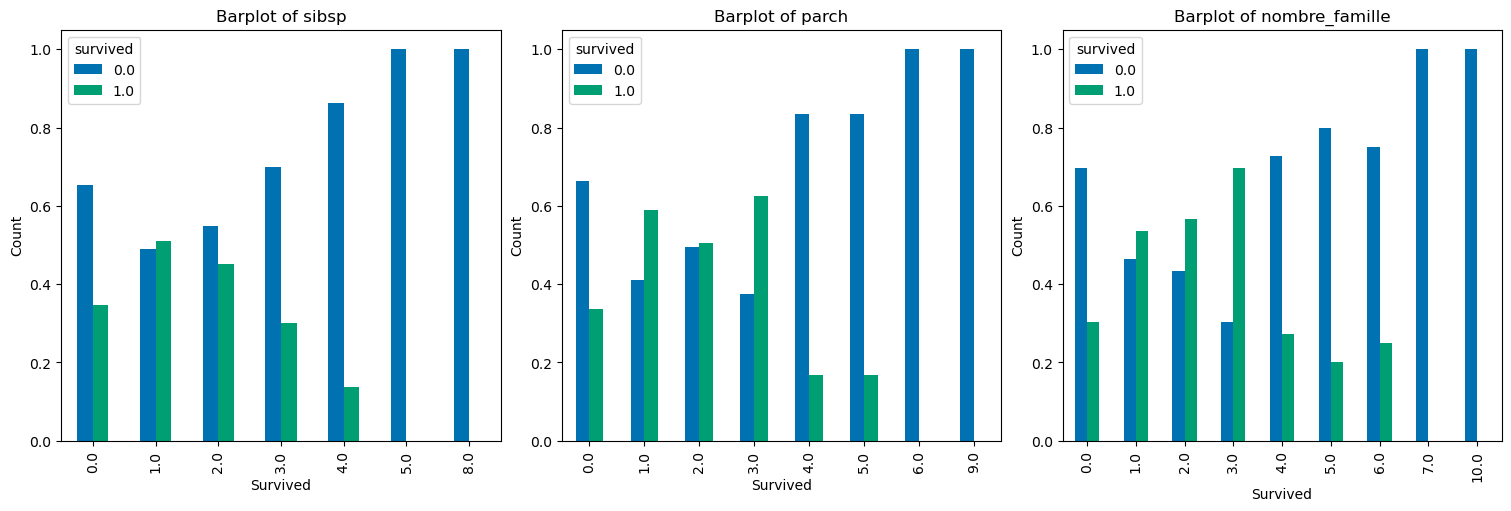

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)
titanic_data2= titanic_data.copy()
titanic_data2['nombre_famille']= titanic_data2['sibsp'] + titanic_data2['parch']

for i, col in enumerate(['sibsp', 'parch', 'nombre_famille']):
    table_effectifs = pd.crosstab(titanic_data2[col],
                                  titanic_data2['survived'],
                                  margins=True,
                                  margins_name="Total",
                                  normalize='index')

    table_effectifs.drop("Total", axis=0, inplace=True)
    table_effectifs.plot(kind="bar", ax=axs[i], title=col)
    axs[i].set_title(f"Barplot of {col}")
    axs[i].set_xlabel("Survived")
    axs[i].set_ylabel("Count")

plt.show()

### Regardons les variables quantitatives

#### Quelles sont les variables quantitatives ?

#### Comment est représenté l'âge des voyageurs ?

Regardons le résumé statistiques :

In [ ]:
# Réalisation d'un boxplot pour visualiser la distribution des âges


#### Comment peut-on regarder la répartition de l'âge sous forme de graphique ?

Regardons un diagramme en barre des effectifs / histogramme

Regardons le boxplot :

https://fr.wikipedia.org/wiki/Bo%C3%AEte_%C3%A0_moustaches

<Axes: xlabel='sex', ylabel='age'>

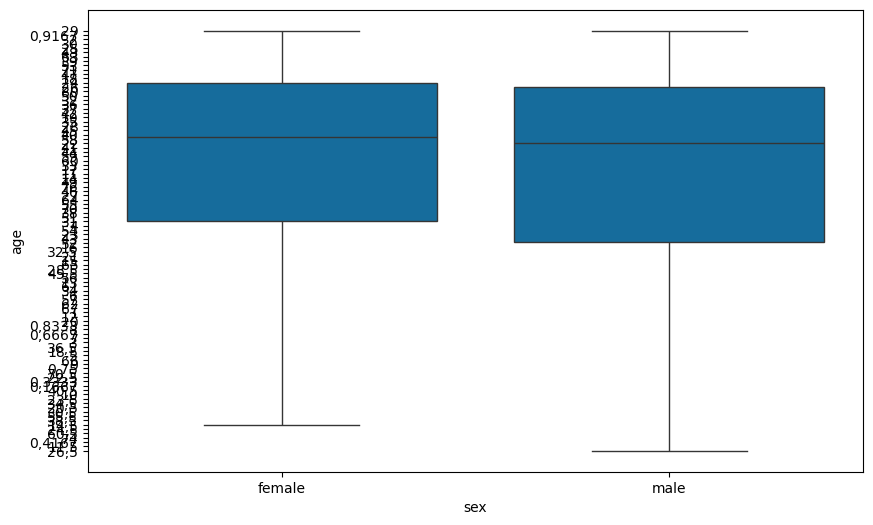

In [ ]:
# Réalisation d'un boxplot pour visualiser la distribution des âges
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='sex', y='age', data=titanic_data, ax=ax)
ax.set_title('Boxplot of age repartition by sex')


#### Continuez d'explorer ce qui vous semble intéressant !

## Croisons un peu les variables !

### Quelle est la part de femmes ayant survécu ?

Regardons la table de contingence en effectifs :

Regardons la table de contingence en fréquences :

### Est-ce que les survivants sont plus des femmes ?

Regardons la table de contingence en proportion en fonction des colonnes

### Est-ce que les femmes sont plus nombreuses à avoir survécu que les hommes ?

Regardons la table de contingence en proportion en fonction des lignes

### Observons ça en graphiques !

Réalisons un diagramme en barres en effectifs

### Comment sont représentés les âges par genre ?

Réalisons le résumé statistique par modalité :

### Regardons ça en graphiques !

Avec le boxplot :

Avec la fonction de répartition empirique :

### Peut-on voir un lien entre l'âge et le prix du ticket ?

Regardons ça avec un scatter plot :

Regardons le coefficient de corrélation :

Réalisons la matrice de corrélation en heatmap pour voir ça graphiquement :

Par défaut, la fonction .corr() calcule la <b/>corrélation de Pearson</b>, adaptée lorsque la relation entre les deux variables est linéaire.<br/>
La <b/>corrélation de Spearman</b> quant à elle mesure la relation monotone entre deux variables en se basant sur les rangs des données. Elle est ainsi moins sensible aux outliers et permet de repérer des relations monotones non linéaires.<br/>

🌞 Ressource : https://datascientest.com/correlations-de-pearson-et-de-spearman <br/>

Calculer le coefficient de corrélation de Spearman et comparer le résultat.

### Semble-t-il y avoir un lien entre la classe sociale et la survie ?

### Continuez d'explorer ce qui vous semble intéressant !

## Tests statistiques

Nous avons pu voir plusieurs informations avec les analyses préliminaires réalisées :
- Les femmes semblent être plus nombreuses à survivre
- Les 1ère classes semblent avoir plus de chance de survivre que les 3ème classe
- ...

### Qu'est-ce qu'un test d'hypothèses ?

Quelques ressources :
- 🌞 https://www.youtube.com/watch?v=0oc49DyA3hU
- 🌞 https://www.youtube.com/watch?v=5koKb5B_YWo

Idée principale : vérifier que les statistiques de l'échantillon sont significatives, c'est à dire que si on reproduit l'expérience, on aurait les mêmes résultats (extrapolation à la population globale).

Autrement dit : à partir des conclusions faites sur un <b/>échantillon</b>, on veut voir si on peut les <b/>généraliser à l'ensemble de la population</b> dont est tiré cet échantillon.

Par exemple si on analyse un échantillon de personnes ayant un cancer en testant deux méthodes pour le soigner et qu'on trouve que la meilleure des solutions est de dormir 12h par nuit, on souhaite que nos statistiques sur cet échantillon soient valables pour toutes les personnes ayant un cancer afin d'être sûre que cette méthode peut être utilisée sur tout le monde.<br/>
<br/>

Il existe différents types de tests, notamment :
- les tests <b/>de conformité à une valeur</b> <i/>(ex : les paquets de farine de ma chaîne de production font-ils bien 500g ?)</i>
- les tests <b/>de comparaison entre des échantillons</b> <i/>(ex : est-ce que les fumeurs ont davantage de risque de cancer que les non fumeurs ?)</i>
- les tests <b/>d'adéquation / de conformité à une loi de probabilité</b> <i/>(ex : est-ce que la distribution des revenus suit une loi normale ?)</i>

Dans chacun des cas, on utilisera une formule spécifique à ce type de test (une fonction différente sur Python).

🌚 Ressource pour plus tard : guide de choix de test statistique - https://help.xlstat.com/fr/6443-which-statistical-test-should-you-use

Commençons par les tests de comparaison de deux moyennes.

### Les femmes ont-elles significativement plus de chance de survie que les hommes ?

Ou la répartition est-elle due au hasard ?

Peut-être que vous vous demandez : ça se voit avec les effectifs, pourquoi le vérifier statistiquement ?

L'idée des tests d'hypothèses est d'extrapoler ce qu'on voit sur un échantillon à la population globale. Dans notre cas, c'est comme si on voulait vérifier si à l'époque la survie des femmes sur les bâteaux qui rencontrent des icebergs est toujours supérieure à celle des hommes. Pour cela on prend notre échantillon du Titanic en référence.

De la même manière, vous avez peut-être déjà entendu parlé de ça en politique pendant les élections, on peut prendre un village qui aurait les mêmes proportions de femmes, de jeunes, d'artisans,... que la France entière (= échantillon) afin d'extrapoler leurs intentions de vote au niveau national.

**Réalisons notre premier test statistique pas à pas !**

Commençons par réaliser les sous-échantillons d'hommes et de femmes :

Calculons le taux de survie dans chaque échantillon pour vérifier que notre hypothèse est plausible :

Réalisons un premier test afin de voir si les deux proportions sont statistiquement significativement différentes :

Quelques petites informations intéressantes, prenez le temps d'y jeter un coup d'oeil :
- Documentation Python :
    - Test sur une moyenne : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp
    - Test de comparaison de 2 moyennes : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
    - Test sur une proportion : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binomtest.html
    - Test de comparaison de 2 proportions : https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html
    - 🌚 Tous les tests d'hypothèse sur Python : https://docs.scipy.org/doc/scipy/reference/stats.html#hypothesis-tests-and-related-functions <br/>
<br/>
- 🌞 Les étapes de la réalisation d'un test d'hypothèses : https://www.youtube.com/watch?v=I3vnzM1X15g&list=PLWwpP-YNkDjYa9PTCOwJ0A6LNtvbjThsf&index=1

A noter que dans la plupart des cas (notamment quand ce n'est pas précisé), on prendra à une pvaleur à 5%

On pose nos hypothèses H0 et H1 :

On réalise notre test :

Analyse des résultats et conclusion :

On peut refaire le test en vérifiant que la survie des femmes est supérieure à celle des hommes :

Conclusion :

### Focus pvalue + intervalle de confiance

Quelques ressources pour bien comprendre la notion de pvaleur :
- https://fr.wikipedia.org/wiki/Valeur_p
- 🌞 https://www.youtube.com/watch?v=vemZtEM63GY
- 🌞 https://www.youtube.com/watch?v=xVIt51ybvu0
- 🌚 https://www.youtube.com/watch?v=jy9b1HSqtSk

Quelques ressources pour bien comprendre la notion d'intervalle de confiance :
- https://fr.wikipedia.org/wiki/Intervalle_de_confiance
- 🌞 https://www.youtube.com/watch?v=TqOeMYtOc1w
- 🌚 simulateur pour aider à la compréhension : https://im2ag-shiny.univ-grenoble-alpes.fr/fcorset/ICmu/

### COMPETENCE - Les 3ème classe ont-il moins de chance de survie que les 1ère classe ?

##### Qu'en est-il des 2nde classe ?

### Les chances de survie des mineurs étaient-elles supérieures à 50% ?

Identifier le type de test à réaliser parmi ceux cités plus haut.

### Le genre et la survie sont-elles deux variables indépendantes ?

Une autre manière d'aborder la question de la survie selon le genre est de réaliser un test d'indépendance du Khi-deux.<br/>
<br/>
🌞 Ressources :
- Pour expliquer ce test : https://datatab.fr/tutorial/chi-square-test
- Test du Khi-deux d'indépendance sur Python : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

In [20]:
# Tableau de contingence avec crosstab


In [21]:
# Test du Khi-deux


### COMPETENCE - Y a-t-il un lien entre le genre et la classe ?

### Continuez d'explorer ce qui vous semble intéressant !

# Petite pause avec le paradoxe de Simpson

🌞 https://www.youtube.com/watch?v=vs_Zzf_vL2I

# Sujet 2 : Enquête sur le bonheur

Des étudiants en Master 1 Sciences Des Données à l'Université Grenoble Alpes ont réalisée une étude sur le bonheur lors d'un de leurs projets tutorés en 2020

Importez les données :

Regardez globalement ce qu'il y a dedans :

A vous d'analyser les données avec tout ce que vous avez appris !

## COMPETENCE - Réaliser une mini infographie d'une demie page avec au moins 5 informations intéressantes découvertes (dont au moins 2 tests d'hypothèses) dans ce jeu de données

#  Sujet 3 (bonus) : Application mobile : jeu Cookie Cats

Les données sont issues de Kaggle : https://www.kaggle.com/datasets/yufengsui/mobile-games-ab-testing

Les tests statistiques sont également utilisés dans le test de nouvelles fonctionnalités (application, site web,...), afin de voir si mettre un bouton en turquoise attire plus qu'un bouton en fushia par exemple.

Ressources :
- https://fr.wikipedia.org/wiki/Test_A/B
- 🌞 https://www.youtube.com/watch?v=BmNBxAhatYI

Importez les données :

Regardez globalement ce qu'il y a dedans :

Nous avons ici plusieurs informations :
- userid : identifiant de l'utilisateur
- version : les deux versions de l'application à comparer
- les indicateurs de performance de l'application :
    - sum_gamerounds : le nombre de tours de jeu joués par le joueur au cours des 14 premiers jours suivant l'installation
    - retention_1 : est-ce que le joueur est revenu et a joué 1 jour après l'installation ?
    - retention_7 : est-ce que le joueur est revenu et a joué 7 jours après l'installation ?

L'idée ici va être de regarder quelle version de l'application permet une meilleure performance de cette dernière en moyenne.

Commençons par créer les deux groupes à comparer :

## En terme de nombre de tours joués par le joueur au cours des 14 premiers jours, quelle version est la meilleure ?

## Par rapport aux joueurs qui reviennent 1 jour après l'installation, quelle version est la meilleure ?

## Par rapport aux joueurs qui reviennent 7 jours après l'installation, quelle version est la meilleure ?

## Quelle version devrait choisir l'éditeur selon vous ?

# BONUS

## Création de nouvelles variables afin d'étoffer l'analyse

Regardez la distribution des âges ou basez vous sur vos propres critères afin de définir des classes d'âge. </br>
Pouvez-vous déceler des informations intéressantes sur les jeunes, les vieux ?

## Nettoyage des données aberrantes

Certaines données extrêmes semblent bizarres, peut-être fausses, il pourrait être intéressant de les enlever dans nos analyses

## Analyse des questions ouvertes

Comment peut-on analyser les questions ouvertes ?

## Tests sur la variance

Il est également possible de réaliser des tests sur la variance. </br>
Si ça vous intéresse n'hésitez pas à creuser le sujet ;)